In [2]:
import pandas as pd
from tabulate import tabulate
import traceback
import numpy as np
import matplotlib.pyplot as plt
from requests import get
import requests
import os

In [5]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Project files/Copy of openpowerlifting-2021-12-10-b420db66.csv")
df

<ipython-input-5-4c8d7a11533c>:2: DtypeWarning: Columns (33,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Project files/Copy of openpowerlifting-2021-12-10-b420db66.csv")


,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,Alona Vladi,F,SBD,Raw,33.0,24-34,24-39,O,58.30,60,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
1,Galina Solovyanova,F,SBD,Raw,43.0,40-44,40-49,M1,73.10,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
2,Daniil Voronin,M,SBD,Raw,15.5,16-17,14-18,T,67.40,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
3,Aleksey Krasov,M,SBD,Raw,35.0,35-39,24-39,O,66.65,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
4,Margarita Pleschenkova,M,SBD,Raw,26.5,24-34,24-39,O,72.45,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569941,Inna Orobets,F,SBD,Single-ply,45.0,45-49,40-49,Open,109.30,84+,...,Yes,Ukraine,NaN,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships
2569942,Ágnes Szabó,F,SBD,Single-ply,27.5,24-34,24-39,Open,113.22,84+,...,Yes,Hungary,NaN,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships
2569943,Brenda van der Meulen,F,SBD,Single-ply,37.5,35-39,24-39,Open,110.79,84+,...,Yes,Netherlands,NaN,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships
2569944,Kelly Phasey,F,SBD,Single-ply,39.5,35-39,40-49,Open,124.53,84+,...,Yes,England,NaN,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships


In [6]:
list(df.columns)

['Name',
 'Sex',
 'Event',
 'Equipment',
 'Age',
 'AgeClass',
 'BirthYearClass',
 'Division',
 'BodyweightKg',
 'WeightClassKg',
 'Squat1Kg',
 'Squat2Kg',
 'Squat3Kg',
 'Squat4Kg',
 'Best3SquatKg',
 'Bench1Kg',
 'Bench2Kg',
 'Bench3Kg',
 'Bench4Kg',
 'Best3BenchKg',
 'Deadlift1Kg',
 'Deadlift2Kg',
 'Deadlift3Kg',
 'Deadlift4Kg',
 'Best3DeadliftKg',
 'TotalKg',
 'Place',
 'Dots',
 'Wilks',
 'Glossbrenner',
 'Goodlift',
 'Tested',
 'Country',
 'State',
 'Federation',
 'ParentFederation',
 'Date',
 'MeetCountry',
 'MeetState',
 'MeetTown',
 'MeetName']

In [ ]:
df.tail(10)

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
15598,Sergiy Chereshnev,M,B,Raw,34.5,24-34,24-39,Pro Military/Fire/Police,82.3,82.5,...,NaN,Ukraine,NaN,WPAU,NaN,2013-09-14,Ukraine,NaN,Melitopol,Open Ukraine Cup
15599,Temur Yuldashev,M,B,Raw,44.0,40-44,40-49,Pro Military/Fire/Police,98.9,100,...,NaN,Ukraine,NaN,WPAU,NaN,2013-09-14,Ukraine,NaN,Melitopol,Open Ukraine Cup
15600,Katerina Glushchenko,F,B,Raw,15.5,16-17,14-18,Pro Teen 16-17,65.0,67.5,...,NaN,Ukraine,NaN,WPAU,NaN,2013-09-14,Ukraine,NaN,Melitopol,Open Ukraine Cup
15601,Olga Grabovska,F,B,Raw,36.5,35-39,24-39,Pro Open,57.1,60,...,NaN,Ukraine,NaN,WPAU,NaN,2013-09-14,Ukraine,NaN,Melitopol,Open Ukraine Cup
15602,Nataliya Penkova,F,B,Raw,47.5,45-49,40-49,Pro Masters 45-49,65.2,67.5,...,NaN,Ukraine,NaN,WPAU,NaN,2013-09-14,Ukraine,NaN,Melitopol,Open Ukraine Cup
15603,Lyudmila Tsvetkova,F,B,Raw,51.5,50-54,50-59,Pro Masters 50-54,55.0,56,...,NaN,Ukraine,NaN,WPAU,NaN,2013-09-14,Ukraine,NaN,Melitopol,Open Ukraine Cup
15604,Olga Grabovska,F,B,Raw,36.5,35-39,24-39,Pro Military/Fire/Police,57.1,60,...,NaN,Ukraine,NaN,WPAU,NaN,2013-09-14,Ukraine,NaN,Melitopol,Open Ukraine Cup
15605,Dmitro Lomeyko,M,B,Multi-ply,30.0,24-34,24-39,Pro Open,91.7,100,...,NaN,Ukraine,NaN,WPAU,NaN,2013-09-14,Ukraine,NaN,Melitopol,Open Ukraine Cup
15606,Denis Borodenko,M,B,Multi-ply,31.5,24-34,24-39,Pro Open,94.6,100,...,NaN,Ukraine,NaN,WPAU,NaN,2013-09-14,Ukraine,NaN,Melitopol,Open Ukraine Cup
15607,Konstyantin Martinenko,M,B,Multi,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
import pandas as pd
from tabulate import tabulate
df_state_men = df.loc[df["Sex"]=="M"].groupby(["State"]).size().to_frame("count").reset_index()
df1 = df_state_men.sort_values(by="count",ascending=False)
print("Top 10 states for Men")
print(tabulate(df1.head(10), headers='keys', tablefmt='psql'))

Top 10 states for Men
+-----+---------+---------+
|     | State   |   count |
|-----+---------+---------|
|  13 | CA      |   32456 |
| 114 | TX      |   23517 |
|  81 | OH      |   11486 |
|  28 | FL      |   11341 |
|  85 | PA      |   10857 |
|  63 | NC      |   10510 |
|  80 | NY      |    9523 |
| 116 | VA      |    9312 |
|  83 | ON      |    9052 |
|   7 | AZ      |    7632 |
+-----+---------+---------+


In [10]:
import pandas as pd
from tabulate import tabulate
df_state_Women = df.loc[df["Sex"]=="F"].groupby(["State"]).size().to_frame("count").reset_index()
df2 = df_state_Women.sort_values(by="count",ascending=False)
print("Top 10 states for Women")
print(tabulate(df2.head(10), headers='keys', tablefmt='psql'))

Top 10 states for Women
+-----+---------+---------+
|     | State   |   count |
|-----+---------+---------|
|  12 | CA      |   14639 |
| 101 | TX      |   11432 |
|  25 | FL      |    5199 |
| 109 | WI      |    4396 |
| 107 | WA      |    4256 |
|  71 | NY      |    4168 |
|  72 | OH      |    4110 |
|  76 | PA      |    4003 |
| 103 | VA      |    3781 |
|  57 | NC      |    3744 |
+-----+---------+---------+


In [12]:
print(list(df))

['Name', 'Sex', 'Event', 'Equipment', 'Age', 'AgeClass', 'BirthYearClass', 'Division', 'BodyweightKg', 'WeightClassKg', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Squat4Kg', 'Best3SquatKg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Bench4Kg', 'Best3BenchKg', 'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Deadlift4Kg', 'Best3DeadliftKg', 'TotalKg', 'Place', 'Dots', 'Wilks', 'Glossbrenner', 'Goodlift', 'Tested', 'Country', 'State', 'Federation', 'ParentFederation', 'Date', 'MeetCountry', 'MeetState', 'MeetTown', 'MeetName']


In [17]:
print(tabulate(df1.iloc[20:30], headers='keys', tablefmt='psql'))

+-----+---------+---------+
|     | State   |   count |
|-----+---------+---------|
|  82 | OK      |    5075 |
|  10 | BC      |    4823 |
| 113 | TN      |    4680 |
|  84 | OR      |    4632 |
|  70 | NM      |    4364 |
|  55 | MI      |    4330 |
|   0 | AB      |    4184 |
|   5 | AL      |    4133 |
|  42 | IN      |    4036 |
|  78 | NV      |    3746 |
+-----+---------+---------+


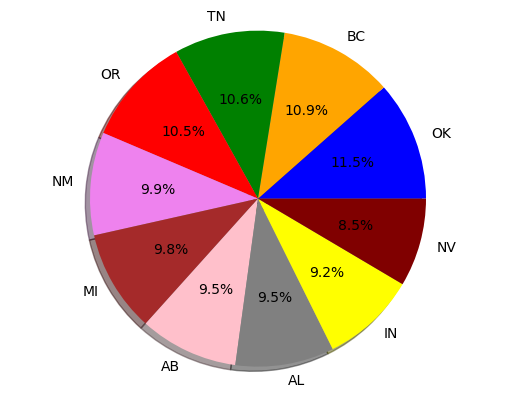

In [27]:
# Pie chart for men in top 21 tp 30 states
import matplotlib.pyplot as plt

data = {"OK": 5075, "BC": 4823, "TN": 4680, "OR": 4632, "NM": 4364,
        "MI": 4330, "AB": 4184, "AL": 4184, "IN": 4036, "NV": 3746}

colors = ["blue", "orange", "green", "red", "violet",
          "brown", "pink", "grey", "yellow", "maroon"]

plt.pie(list(data.values()), labels=data.keys(), colors=colors,
        autopct='%2.1f%%', shadow=True, startangle=0) #here the starting angle is the origin "0"

plt.axis("equal")
plt.show()

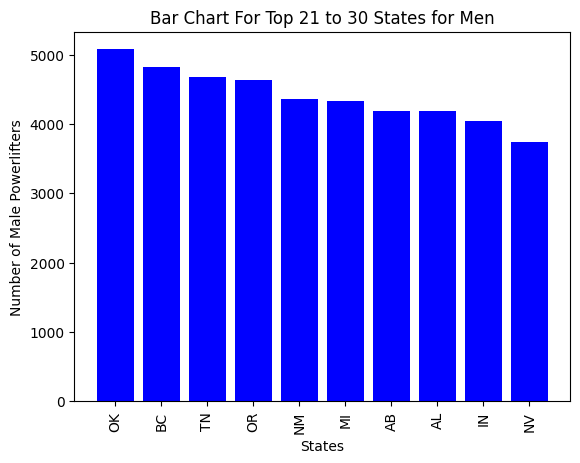

In [30]:
#Bar chart for men
plt.bar(data.keys(), data.values(), color="blue")
plt.xlabel("States")
plt.ylabel("Number of Male Powerlifters")
plt.title("Bar Chart For Top 21 to 30 States for Men")
plt.xticks(rotation=90)
plt.show()


In [32]:
print(tabulate(df2.iloc[20:30], headers='keys', tablefmt='psql'))

+----+---------+---------+
|    | State   |   count |
|----+---------+---------|
| 36 | IL      |    2184 |
| 45 | MA      |    2174 |
| 62 | NJ      |    2169 |
| 50 | MI      |    2115 |
|  0 | AB      |    1870 |
|  9 | BC      |    1744 |
| 37 | IN      |    1733 |
| 32 | HI      |    1717 |
|  4 | AL      |    1343 |
| 73 | OK      |    1337 |
+----+---------+---------+


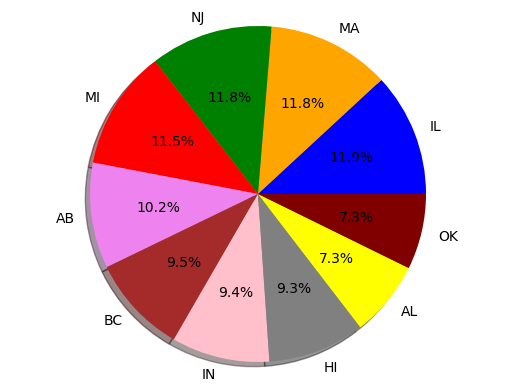

In [33]:
# Pie chart for women in Top 21 to 30
import matplotlib.pyplot as plt

data = {"IL": 2184, "MA": 2174, "NJ": 2169, "MI": 2115, "AB": 1870,
        "BC": 1744, "IN": 1733, "HI": 1717, "AL": 1343, "OK": 1337}

colors = ["blue", "orange", "green", "red", "violet",
          "brown", "pink", "grey", "yellow", "maroon"]

plt.pie(list(data.values()), labels=data.keys(), colors=colors,
        autopct='%2.1f%%', shadow=True, startangle=0) #here the starting angle is the origin "0"

plt.axis("equal")
plt.show()

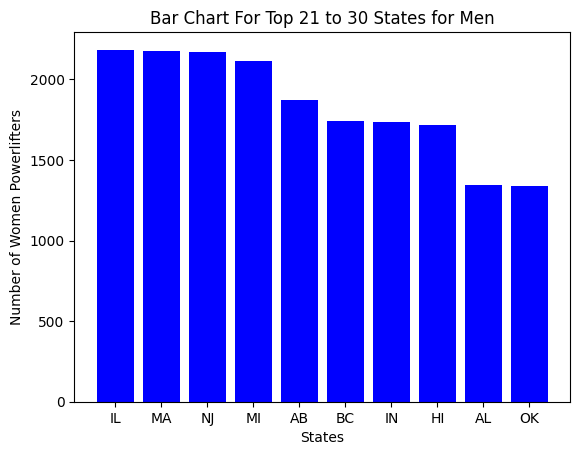

In [35]:
#Bar chart for Women
plt.bar(data.keys(), data.values(), color="blue")
plt.xlabel("States")
plt.ylabel("Number of Women Powerlifters")
plt.title("Bar Chart For Top 21 to 30 States for Men")
plt.xticks(rotation=0)
plt.show()

In [36]:
#Top 10 state for Men in 2021
df_2021 = df[df['Date'].str.contains('2021')]
df_state_men_2021 = df_2021.loc[df_2021["Sex"]=="M"].groupby(["State"]).size().to_frame("count").reset_index()
df1_2021 = df_state_men_2021.sort_values(by="count",ascending=False)
print("Top 10 states for Men in 2021")
print(tabulate(df1_2021.head(10), headers='keys', tablefmt='psql'))

#Top 10 state for Women in 2021
df_state_women_2021 = df_2021.loc[df_2021["Sex"]=="F"].groupby(["State"]).size().to_frame("count").reset_index()
df2_2021 = df_state_women_2021.sort_values(by="count",ascending=False)
print("Top 10 states for Women in 2021")
print(tabulate(df2_2021.head(10), headers='keys', tablefmt='psql'))


Top 10 states for Men in 2021
+----+---------+---------+
|    | State   |   count |
|----+---------+---------|
|  7 | CA      |    3384 |
| 70 | TX      |    3037 |
| 16 | FL      |    1781 |
| 51 | OH      |    1529 |
| 55 | PA      |    1183 |
| 72 | VA      |    1156 |
| 38 | NC      |    1109 |
| 50 | NY      |    1033 |
| 17 | GA      |     935 |
| 34 | MO      |     893 |
+----+---------+---------+
Top 10 states for Women in 2021
+----+---------+---------+
|    | State   |   count |
|----+---------+---------|
|  7 | CA      |    1578 |
| 63 | TX      |    1572 |
| 13 | FL      |     921 |
| 47 | OH      |     680 |
| 35 | NC      |     635 |
| 65 | VA      |     542 |
| 46 | NY      |     530 |
| 51 | PA      |     502 |
| 29 | MI      |     478 |
| 24 | LA      |     473 |
+----+---------+---------+


<ipython-input-71-adde8d3202b6>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sex_counts = df.groupby(['AgeGroup', 'Sex']).size().unstack(fill_value=0)


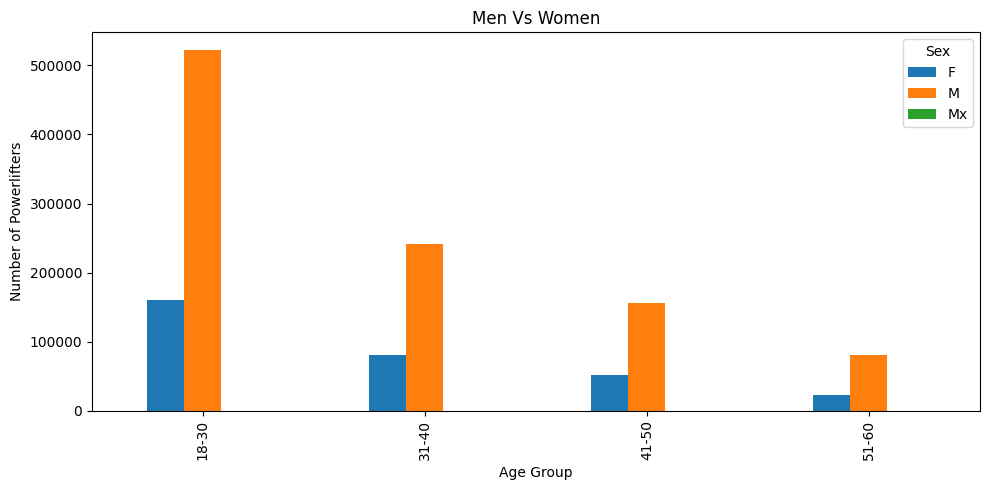

In [71]:
# Create age groups
bins = [18, 30, 40, 50, 60]
labels = ['18-30', '31-40', '41-50', '51-60']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group by age group and sex
age_sex_counts = df.groupby(['AgeGroup', 'Sex']).size().unstack(fill_value=0)

# Plot bar chart
age_sex_counts.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Age Group')
plt.ylabel('Number of Powerlifters')
plt.title('Men Vs Women')
plt.legend(title='Sex')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<ipython-input-60-4efe5dbedef5>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_counts = df.groupby('AgeGroup').size()


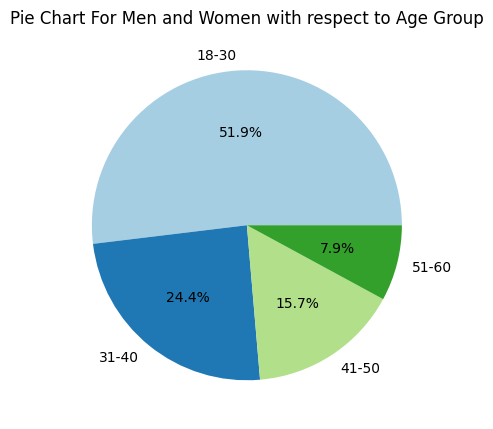

In [60]:
# Group by age group and sum the counts for both sexes
age_counts = df.groupby('AgeGroup').size()

# Plot pie chart
plt.figure(figsize=(5, 8))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=0, colors=plt.cm.Paired.colors)
plt.title('Pie Chart For Men and Women with respect to Age Group')
plt.show()


<ipython-input-61-cf992d0aab4b>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_counts_men = df_men.groupby('AgeGroup').size()


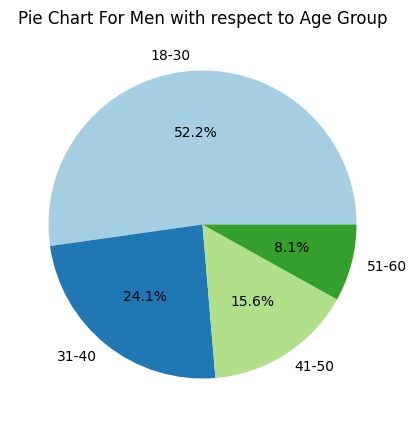

In [61]:
# prompt: create Pie Chart only For Men with respect to Age Group like the above

# Filter the DataFrame for men only
df_men = df[df['Sex'] == 'M']

# Group by age group and sum the counts
age_counts_men = df_men.groupby('AgeGroup').size()

# Plot pie chart for men
plt.figure(figsize=(8, 5))
plt.pie(age_counts_men, labels=age_counts_men.index, autopct='%1.1f%%', startangle=0, colors=plt.cm.Paired.colors)
plt.title('Pie Chart For Men with respect to Age Group')
plt.show()


<ipython-input-62-57a0d2387d0d>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_counts_men = df_men.groupby('AgeGroup').size()


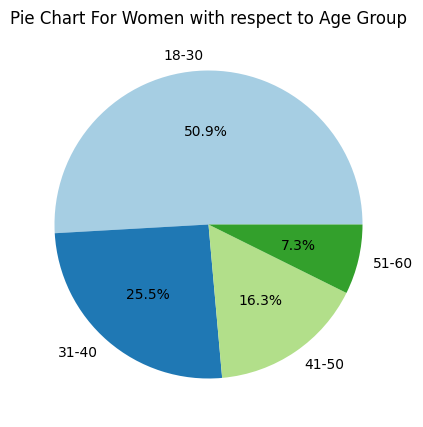

In [62]:
df_men = df[df['Sex'] == 'F']

# Group by age group and sum the counts
age_counts_men = df_men.groupby('AgeGroup').size()

# Plot pie chart for men
plt.figure(figsize=(8, 5))
plt.pie(age_counts_men, labels=age_counts_men.index, autopct='%1.1f%%', startangle=0, colors=plt.cm.Paired.colors)
plt.title('Pie Chart For Women with respect to Age Group')
plt.show()


<ipython-input-67-3b1d6b2312bb>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_counts_men = df_men.groupby('AgeGroup').size()


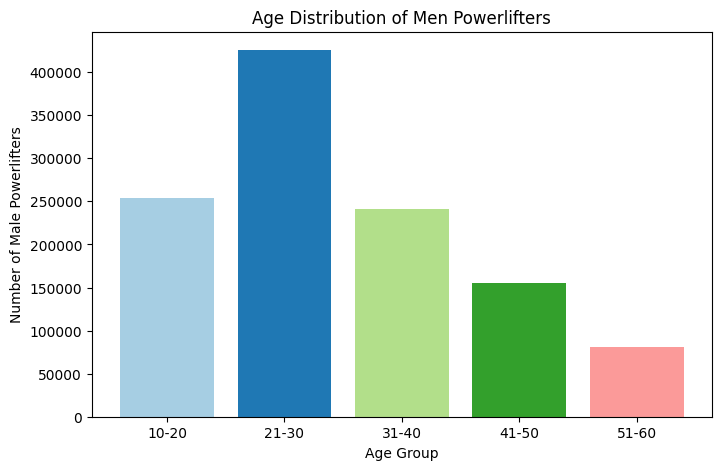

In [67]:
#Bar chart for the men w.r.t age group
# Create age groups
bins = [10, 20, 30, 40, 50, 60]
labels = ['10-20', '21-30', '31-40', '41-50', '51-60']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Filtering the DataFrame for men only
df_men = df[df['Sex'] == 'M']

# Group by age group and sum the counts
age_counts_men = df_men.groupby('AgeGroup').size()

# Plot bar chart for men
plt.figure(figsize=(8, 5))
plt.bar(age_counts_men.index, age_counts_men.values, color=plt.cm.Paired.colors)
plt.xlabel('Age Group')
plt.ylabel('Number of Male Powerlifters')
plt.title('Age Distribution of Men Powerlifters')
plt.xticks(rotation=0)
plt.show()


<ipython-input-69-b23cac275e28>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_counts_women = df_women.groupby('AgeGroup').size()


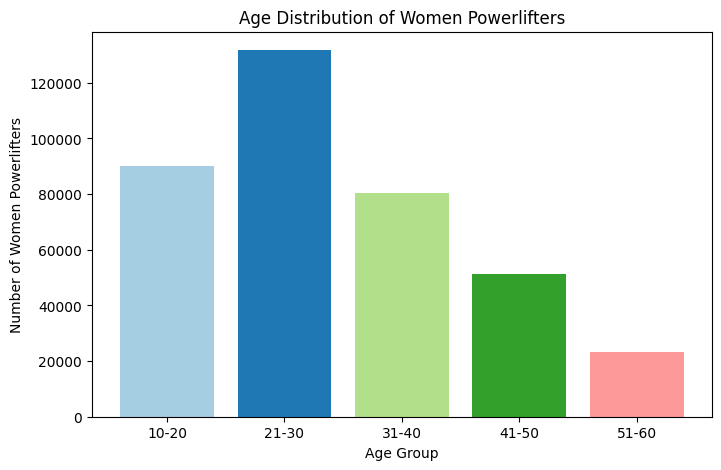

In [69]:
#Bar chart for the women w.r.t age group
# Create age groups
bins = [10, 20, 30, 40, 50, 60]
labels = ['10-20', '21-30', '31-40', '41-50', '51-60']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Filtering the DataFrame for Women only
df_women = df[df['Sex'] == 'F']

# Group by age group and sum the counts
age_counts_women = df_women.groupby('AgeGroup').size()

# Plot bar chart for women
plt.figure(figsize=(8, 5))
plt.bar(age_counts_women.index, age_counts_women.values, color=plt.cm.Paired.colors)
plt.xlabel('Age Group')
plt.ylabel('Number of Women Powerlifters')
plt.title('Age Distribution of Women Powerlifters')
plt.xticks(rotation=0)
plt.show()
